# Diversity - Simplex


In [2]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mpltern
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
from mpltern.datasets import get_shanon_entropies
from mpltern.datasets import get_triangular_grid


## Data Generation

In [35]:
t, l, r = get_triangular_grid(40)

## Diversity Computation

In [36]:
from skbio.diversity import alpha_diversity

div_shannon = alpha_diversity("shannon", np.array([t, l, r]).T)
div_simpson = alpha_diversity("simpson", np.array([t, l, r]).T)

In [5]:
# Define a function to format the tick values
def format_tick(value, tick_number):
    return f'{value:.1f}'  # Change to the desired number of decimal places

# Define the colors for the colormap
colors = ["blue", (1, 0.6, 0)]

# Create the colormap
cmap = LinearSegmentedColormap.from_list("custom", colors)


In [6]:
level_num = 7

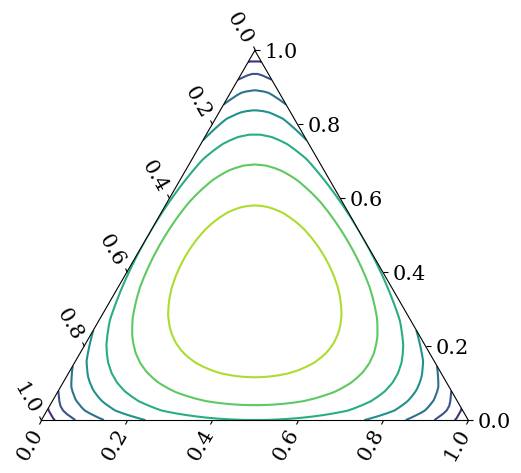

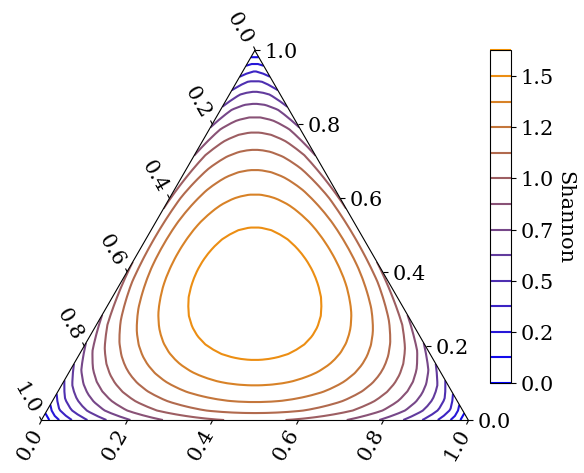

In [7]:
plt.rcParams.update({'font.size': 15, 'font.family': 'serif'})
fig = plt.figure(figsize=(10.8, 4.8))
ax = plt.subplot(projection="ternary")

vmin = 0.0
vmax = 1.2

levels = np.linspace(vmin, vmax, level_num)

pc = ax.tricontour(t, l, r, div_shannon)
levels_used = pc.levels

# Interpolate 14 levels within the range of levels used
new_levels = np.linspace(levels_used.min(), levels_used.max(), 14)

# Generate the contour plot again with the new levels
fig = plt.figure(figsize=(10.8, 4.8))
ax = plt.subplot(projection="ternary")
pc = ax.tricontour(t, l, r, div_shannon, levels=new_levels, cmap=cmap)


cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label('Shannon', rotation=270, va='baseline')
plt.rcParams.update({'font.size': 32, 'font.family': 'serif'})
colorbar.formatter = FuncFormatter(format_tick)
colorbar.update_ticks()

fig.savefig("../figures/SimulatedData/diversity_shannon.pdf", bbox_inches='tight')

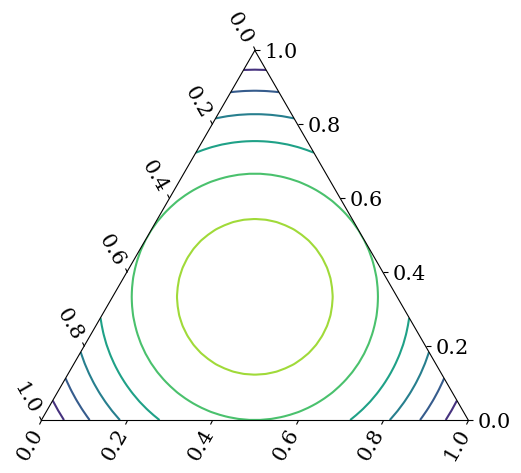

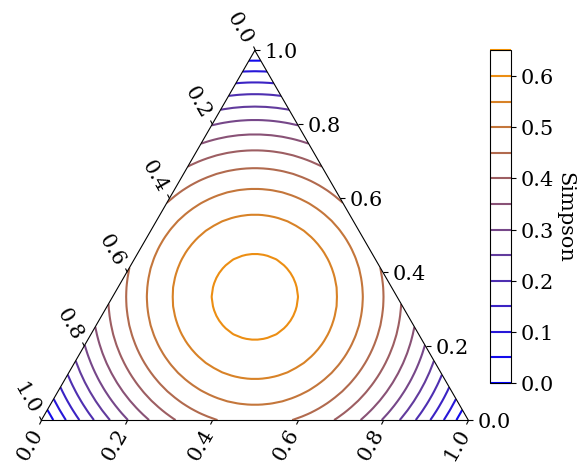

In [8]:
plt.rcParams.update({'font.size': 15, 'font.family': 'serif'})
fig = plt.figure(figsize=(10.8, 4.8))
ax = plt.subplot(projection="ternary")

vmin = 0.0
vmax = 1.2

levels = np.linspace(vmin, vmax, level_num)

pc = ax.tricontour(t, l, r, div_simpson)
levels_used = pc.levels

# Interpolate 14 levels within the range of levels used
new_levels = np.linspace(levels_used.min(), levels_used.max(), 14)

# Generate the contour plot again with the new levels
fig = plt.figure(figsize=(10.8, 4.8))
ax = plt.subplot(projection="ternary")
pc = ax.tricontour(t, l, r, div_simpson, levels=new_levels, cmap=cmap)


cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label('Simpson', rotation=270, va='baseline')
plt.rcParams.update({'font.size': 32, 'font.family': 'serif'})
colorbar.formatter = FuncFormatter(format_tick)
colorbar.update_ticks()

fig.savefig("../figures/SimulatedData/diversity_simpson.pdf", bbox_inches='tight')

## Plot Shannon and Simpson in one ternary

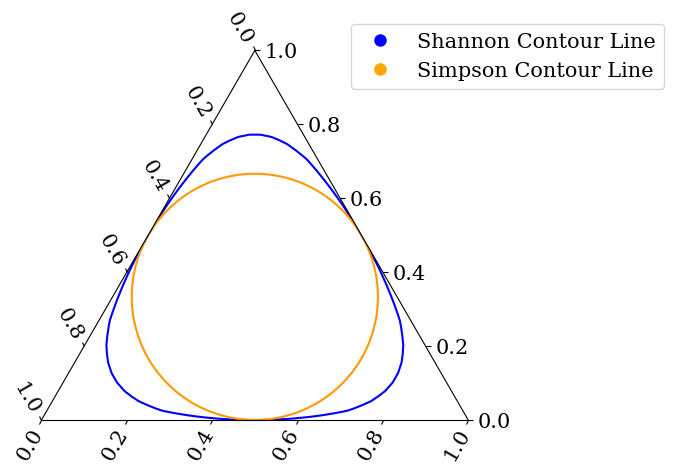

In [116]:
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 15, 'font.family': 'serif'})
fig = plt.figure(figsize=(10.8, 4.8))
ax = plt.subplot(projection="ternary")

vmin = 1.0
vmax = 1.2

level_num = 1
levels = np.linspace(vmin, vmax, level_num)

#pc = ax.tricontour(t, l, r, div_simpson, levels=levels)

# Plotting div_shannon
pc = ax.tricontour(t, l, r, div_shannon, levels=levels, cmap=cmap)


vmin = 0.5
vmax = 1.2

level_num = 1
levels = np.linspace(vmin, vmax, level_num)

# Plotting div_simpson on the same axes
pc2 = ax.tricontour(t, l, r, div_simpson, levels=levels, cmap=cmap.reversed())


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Shannon Contour Line',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Simpson Contour Line',
                          markerfacecolor='orange', markersize=10)]

#ax.legend(handles=legend_elements, loc='upper right')
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.7, 1.1))

fig.savefig("../figures/SimulatedData/diversity_comparison.pdf", bbox_inches='tight')

In [79]:
levels

array([0.2, 1.2])

## Synthetic Outcome Function

For the outcome to be explained by diversity, we can actually see that lower diversity can mean either increase or decrease.

In [11]:
from skbio.stats.composition import ilr
x_ilr = ilr(np.array([t + 0.001, l + 0.001, r + 0.001]).T)

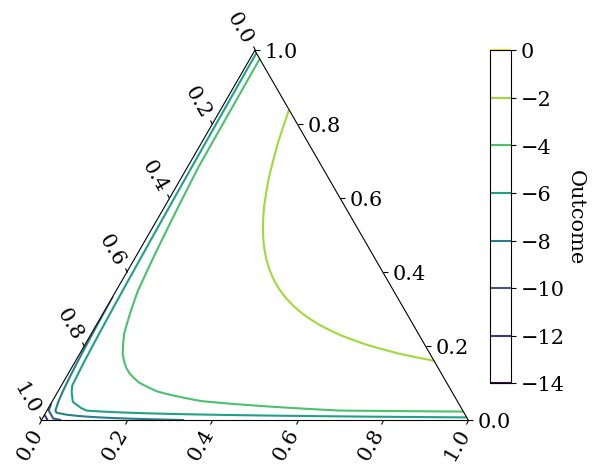

In [14]:
plt.rcParams.update({'font.size': 15, 'font.family': 'serif'})

fig = plt.figure(figsize=(10.8, 4.8))

outcome = np.log(t + 0.001) + np.log(r + 0.001)

ax = plt.subplot(projection="ternary")
#pc = ax.tripcolor(t, l, r, outcome)
pc = ax.tricontour(t, l, r, outcome)

vmin = 0.0
vmax = 1.2
levels = np.linspace(vmin, vmax, 10)

cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label('Outcome', rotation=270, va='baseline')

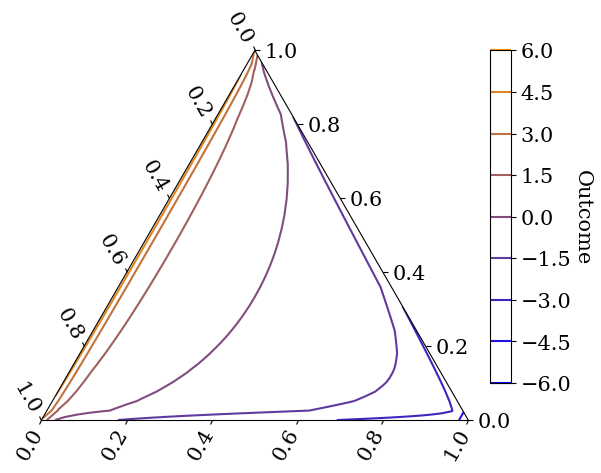

In [15]:
plt.rcParams.update({'font.size': 15, 'font.family': 'serif'})
fig = plt.figure(figsize=(10.8, 4.8))

outcome = x_ilr[:,1]

ax = plt.subplot(projection="ternary")
pc = ax.tricontour(t, l, r, outcome, cmap=cmap)

vmin = 0.0
vmax = 1.2
levels = np.linspace(vmin, vmax, 10)

cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label('Outcome', rotation=270, va='baseline')
fig.savefig("../figures/SimulatedData/ilr_component1.pdf", bbox_inches='tight')

In [40]:
d

array([[ 0.        , -0.03993056,  0.03993056, -0.07638889,  0.        ,
         0.07638889, -0.109375  , -0.03645833,  0.03645833,  0.109375  ,
        -0.13888889, -0.06944444,  0.        ,  0.06944444,  0.13888889,
        -0.16493056, -0.09895833, -0.03298611,  0.03298611,  0.09895833,
         0.16493056, -0.1875    , -0.125     , -0.0625    ,  0.        ,
         0.0625    ,  0.125     ,  0.1875    , -0.20659722, -0.14756944,
        -0.08854167, -0.02951389,  0.02951389,  0.08854167,  0.14756944,
         0.20659722, -0.22222222, -0.16666667, -0.11111111, -0.05555556,
         0.        ,  0.05555556,  0.11111111,  0.16666667,  0.22222222,
        -0.234375  , -0.18229167, -0.13020833, -0.078125  , -0.02604167,
         0.02604167,  0.078125  ,  0.13020833,  0.18229167,  0.234375  ,
        -0.24305556, -0.19444444, -0.14583333, -0.09722222, -0.04861111,
         0.        ,  0.04861111,  0.09722222,  0.14583333,  0.19444444,
         0.24305556, -0.24826389, -0.203125  , -0.1